In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
train=pd.read_csv("../input/train_2.csv")

In [3]:
train.shape

(145063, 794)

In [4]:
train['wikimedia']=train['Page'].apply(lambda u: "wikimedia" in u)
train['mediawiki']=train['Page'].apply(lambda u: "mediawiki" in u)
train['wikipedia']=train['Page'].apply(lambda u: "wikipedia" in u)

In [5]:
def parse_wikipedia_page(page):
    a,b=page.split('.wikipedia.org_')
    locale=a[-2:]
    article=a[:len(a)-3]
    access,agent=b.split("_")
    return article,locale,access,agent
def parse_wikimedia_page(page):
    a,b=page.split('_commons.wikimedia.org_')
    locale="wikmed"
    article=a 
    access,agent=b.split("_")
    return article,locale,access,agent
def parse_mediawiki_page(page):
    a,b=page.split('_www.mediawiki.org_')
    locale="medwik"
    article=a 
    access,agent=b.split("_")
    return article,locale,access,agent
def parse_page(page):
    if "wikimedia" in page:
        return parse_wikimedia_page(page)
    if "mediawiki" in page:
        return parse_mediawiki_page(page)
    if "wikipedia" in page:
        return parse_wikipedia_page(page)    

In [6]:
parse_mediawiki_page(train.loc[19611,"Page"])

('"Keep_me_logged_in"_extended_to_one_year',
 'medwik',
 'all-access',
 'all-agents')

In [7]:
parsed_page= train.Page.apply(lambda u: np.array(parse_page(u)))

In [8]:
train['article']=parsed_page.apply(lambda u: u[0])
train['locale']=parsed_page.apply(lambda u: u[1])
train['access']=parsed_page.apply(lambda u: u[2])
train['agent']=parsed_page.apply(lambda u: u[3])

In [9]:
train[train.mediawiki].head()

Page  2015-07-01  \
19611  "Keep_me_logged_in"_extended_to_one_year_www.m...         NaN   
19612  2017_wikitext_editor_www.mediawiki.org_all-acc...         NaN   
19613  2017_wikitext_editor/Feedback_www.mediawiki.or...         NaN   
19614        API_www.mediawiki.org_all-access_all-agents       528.0   
19615  API:Account_creation_www.mediawiki.org_all-acc...        37.0   

       2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  \
19611         NaN         NaN         NaN         NaN         NaN         NaN   
19612         NaN         NaN         NaN         NaN         NaN         NaN   
19613         NaN         NaN         NaN         NaN         NaN         NaN   
19614       587.0       634.0       483.0       510.0       559.0       625.0   
19615        38.0        46.0        41.0        79.0        91.0       100.0   

       2015-07-08  2015-07-09     ...      2017-08-29  2017-08-30  2017-08-31  \
19611         NaN         NaN     ...            16.0        51.0         NaN   
19612         NaN         NaN     ...            41.0        40.0         NaN   
19613         NaN         NaN     ...            20.0        20.0         NaN   
19614       594.0       565.0     ...           546.0       455.0         NaN   
19615        54.0        43.0     ...            42.0        23.0         NaN   

       wikimedia  mediawiki  wikipedia  \
19611      False       True      False   
19612      False       True      False   
19613      False       True      False   
19614      False       True      False   
19615      False       True      False   

                                        article  locale      access  \
19611  "Keep_me_logged_in"_extended_to_one_year  medwik  all-access   
19612                      2017_wikitext_editor  medwik  all-access   
19613             2017_wikitext_editor/Feedback  medwik  all-access   
19614                                       API  medwik  all-access   
19615                      API:Account_creation  medwik  all-access   

            agent  
19611  all-agents  
19612  all-agents  
19613  all-agents  
19614  all-agents  
19615  all-agents  

[5 rows x 801 columns]

In [10]:
train.agent.value_counts()

all-agents    110150
spider         34913
Name: agent, dtype: int64

In [11]:
train[['locale','agent','access']].groupby(['locale','agent']).count() 

access
locale agent             
de     all-agents   13960
       spider        4587
en     all-agents   19177
       spider        4931
es     all-agents   10532
       spider        3537
fr     all-agents   13302
       spider        4500
ja     all-agents   15424
       spider        5007
medwik all-agents    5551
       spider        1749
ru     all-agents   11280
       spider        3742
wikmed all-agents    8005
       spider        2550
zh     all-agents   12919
       spider        4310

In [12]:
date_cols=[u for u in train.columns if u.startswith('20')]

In [13]:
train[date_cols]=train[date_cols].fillna(0).astype(np.int32)

In [14]:
train.head()

Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider          18          11   
1             2PM_zh.wikipedia.org_all-access_spider          11          14   
2              3C_zh.wikipedia.org_all-access_spider           1           0   
3         4minute_zh.wikipedia.org_all-access_spider          35          13   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...           0           0   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0           5          13          14           9           9          22   
1          15          18          11          13          22          11   
2           1           1           0           4           0           3   
3          10          94           4          26          14           9   
4           0           0           0           0           0           0   

   2015-07-09   ...    2017-08-29  2017-08-30  2017-08-31  wikimedia  \
0          26   ...            26          24          21      False   
1          10   ...            29          34          25      False   
2           4   ...             8          12           9      False   
3          11   ...            20         110          15      False   
4           0   ...            20          17          24      False   

   mediawiki  wikipedia           article  locale      access   agent  
0      False       True              2NE1      zh  all-access  spider  
1      False       True               2PM      zh  all-access  spider  
2      False       True                3C      zh  all-access  spider  
3      False       True           4minute      zh  all-access  spider  
4      False       True  52_Hz_I_Love_You      zh  all-access  spider  

[5 rows x 801 columns]

In [15]:
train[['wikimedia','mediawiki','wikipedia']]=train[['wikimedia','mediawiki','wikipedia']].astype(np.int8)

In [16]:
train.to_csv('../input/newtrain_2.csv',index=None)

In [17]:
train[train.wikipedia>0][train.agent!='spider'].head()

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


Page  2015-07-01  \
4310  10_Cloverfield_Lane_fr.wikipedia.org_desktop_a...           0   
4311   1984_(roman)_fr.wikipedia.org_desktop_all-agents         421   
4312  24_Heures_du_Mans_fr.wikipedia.org_desktop_all...         203   
4313  24_Heures_du_Mans_2016_fr.wikipedia.org_deskto...          19   
4314  2_Broke_Girls_fr.wikipedia.org_desktop_all-agents         250   

      2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  \
4310           0           0           0           0           0           0   
4311         438         351         259         329         383         361   
4312         188         208         169         170         172         147   
4313          14          20           8          10          26          24   
4314         200         179         183         204         204         212   

      2015-07-08  2015-07-09     ...      2017-08-29  2017-08-30  2017-08-31  \
4310           0           0     ...             100         117          93   
4311         333         327     ...             426         429         442   
4312         194         143     ...             141         114         112   
4313          17           9     ...              18          14          22   
4314         212         185     ...              96         149         108   

      wikimedia  mediawiki  wikipedia                 article  locale  \
4310          0          0          1     10_Cloverfield_Lane      fr   
4311          0          0          1            1984_(roman)      fr   
4312          0          0          1       24_Heures_du_Mans      fr   
4313          0          0          1  24_Heures_du_Mans_2016      fr   
4314          0          0          1           2_Broke_Girls      fr   

       access       agent  
4310  desktop  all-agents  
4311  desktop  all-agents  
4312  desktop  all-agents  
4313  desktop  all-agents  
4314  desktop  all-agents  

[5 rows x 801 columns]

In [18]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
def g_1(x):
    plt.plot(x);plt.show()
    plt.plot(np.log10(x+1));plt.show()
    x=x[x>0]
    plt.hist(x,bins=40);plt.show()
    plt.hist(np.log10(x+1),bins=40);plt.show()
def g(x):
    g_1(x)
    x=moving_average(x,60)
    g_1(x)

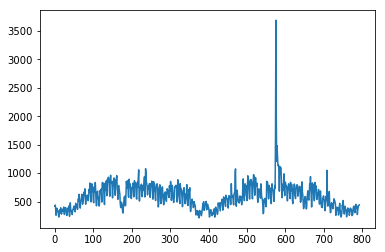

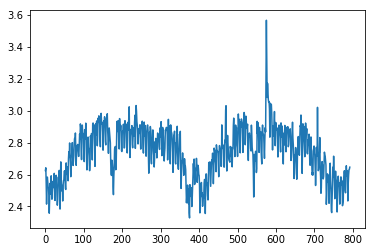

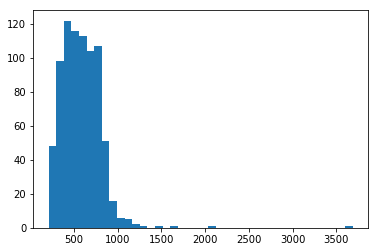

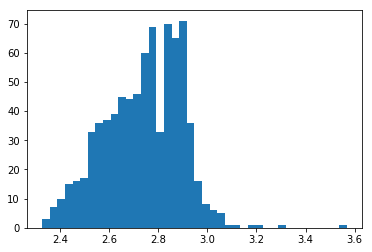

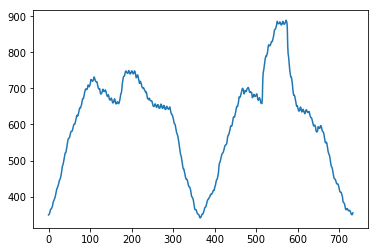

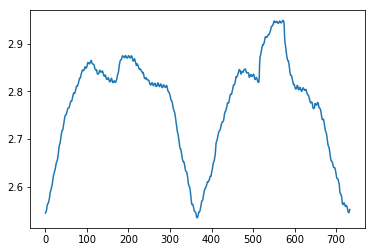

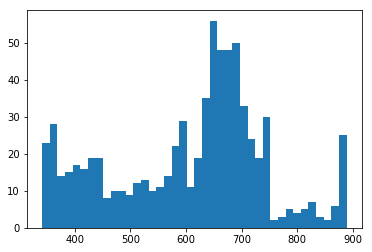

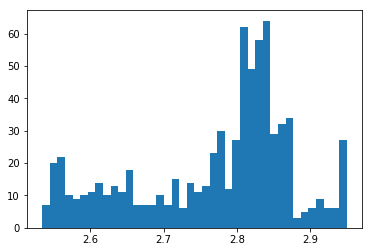

In [19]:

g(train.loc[4311,date_cols].astype(np.float32).values)

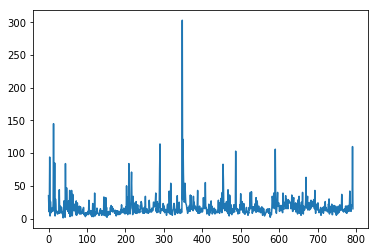

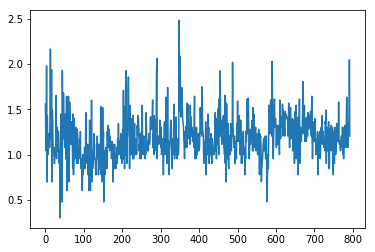

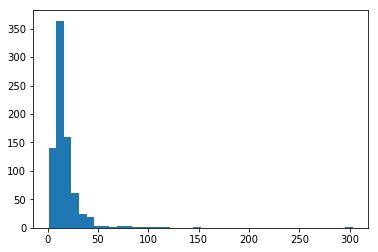

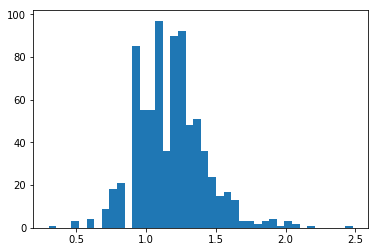

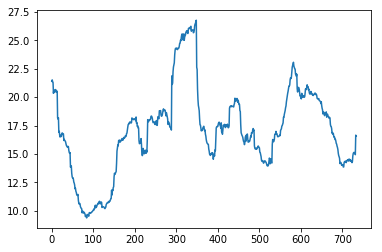

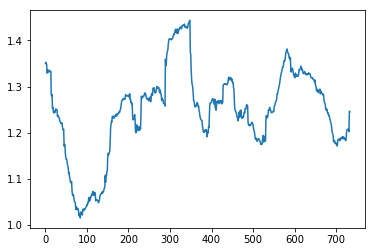

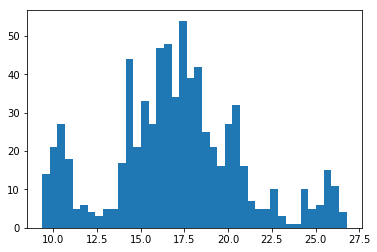

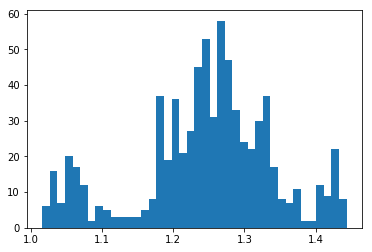

In [20]:
g(train.loc[3,date_cols].astype(np.float32).values)

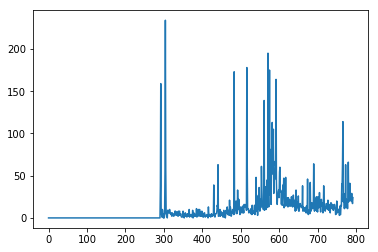

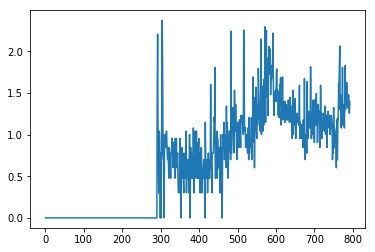

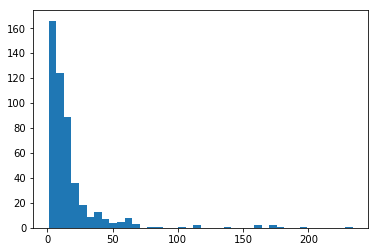

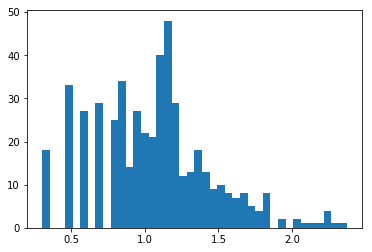

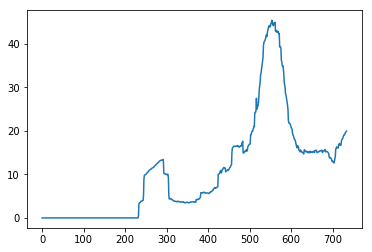

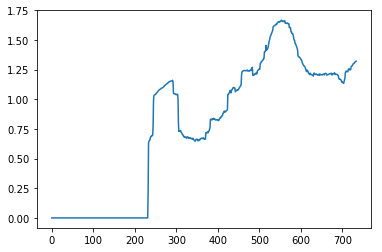

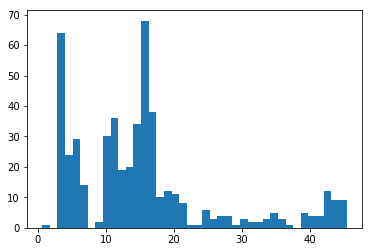

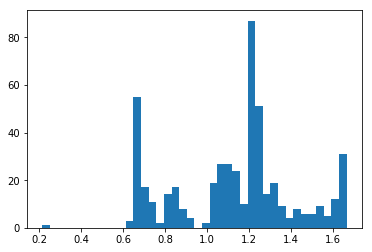

In [21]:
g(train.loc[4,date_cols].astype(np.float32).values)